# Isotonic Regression


In [7]:
import numpy as np
import jax.numpy as jnp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
from scope import ScopeSolver

import warnings
warnings.filterwarnings('ignore')

In [8]:
# random walk with normal increment
def gen_normal(n_step=500):
    x = np.random.randn(n_step) / jnp.sqrt(n_step)
    x = jnp.insert(x, 0, 0)
    y = 30 * np.random.normal(size=n_step) + 50.0 * np.log1p(np.arange(n_step))
    return y

def isotonic_regression(y, k):
    y = jnp.array(y)
    p = len(y)

    # we hope the jump is sparse, thus defining params
    # to be the successive increment of y, i.e.
    # y can be represented as the cumsum of params
    def custom_objective(params):
        return jnp.sum(jnp.square(y - jnp.cumsum(jnp.abs(params))))  # the 
    
    solver = ScopeSolver(p, k)
    params = solver.solve(custom_objective)
    y_pred = jnp.cumsum(jnp.abs(params))

    return y_pred

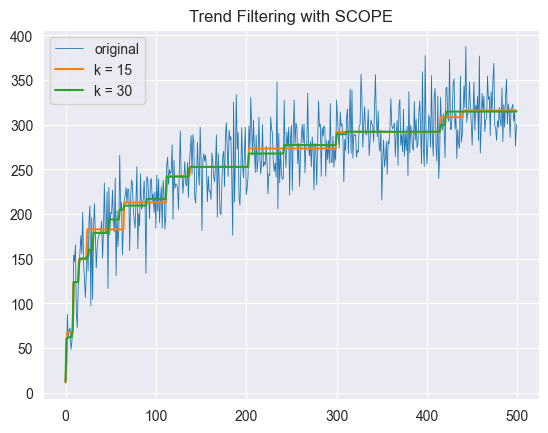

In [9]:
np.random.seed(0)
y = gen_normal(500)
k_list = [15, 30]
sns.lineplot(y, label='original', linewidth=0.6)
for k in k_list:
    yk = isotonic_regression(y=y, k=k)
    sns.lineplot(yk, label=r'k = {}'.format(k))

plt.legend()
plt.title('Isotonic Regression with SCOPE')
plt.show()

Reference
-----

- https://scikit-learn.org/stable/auto_examples/miscellaneous/plot_isotonic_regression.html